<a href="https://colab.research.google.com/github/anton-gavrilin/colab_google/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project description:
* The aim of the project is to predict whether it is a malignant or benign breast cancer tumor.

Initialization of modules

In [ ]:
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Read data about breast cancers with getting top 5 of benign and malignant
Description of data and every column:

   I  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [ ]:
breast_data = pd.read_csv("breast_cancer.csv")
print(breast_data.info())

print(breast_data[breast_data["Class"] == 2].head()) # Get data where class equaled benign(2)
print(breast_data[breast_data["Class"] == 4].head()) # Get data where class equaled malignant(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Code                         699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB
None
      Code  Clump Thickness  Uniformity of Cell Size  \
0  1000025                5                        1   
1  1002945

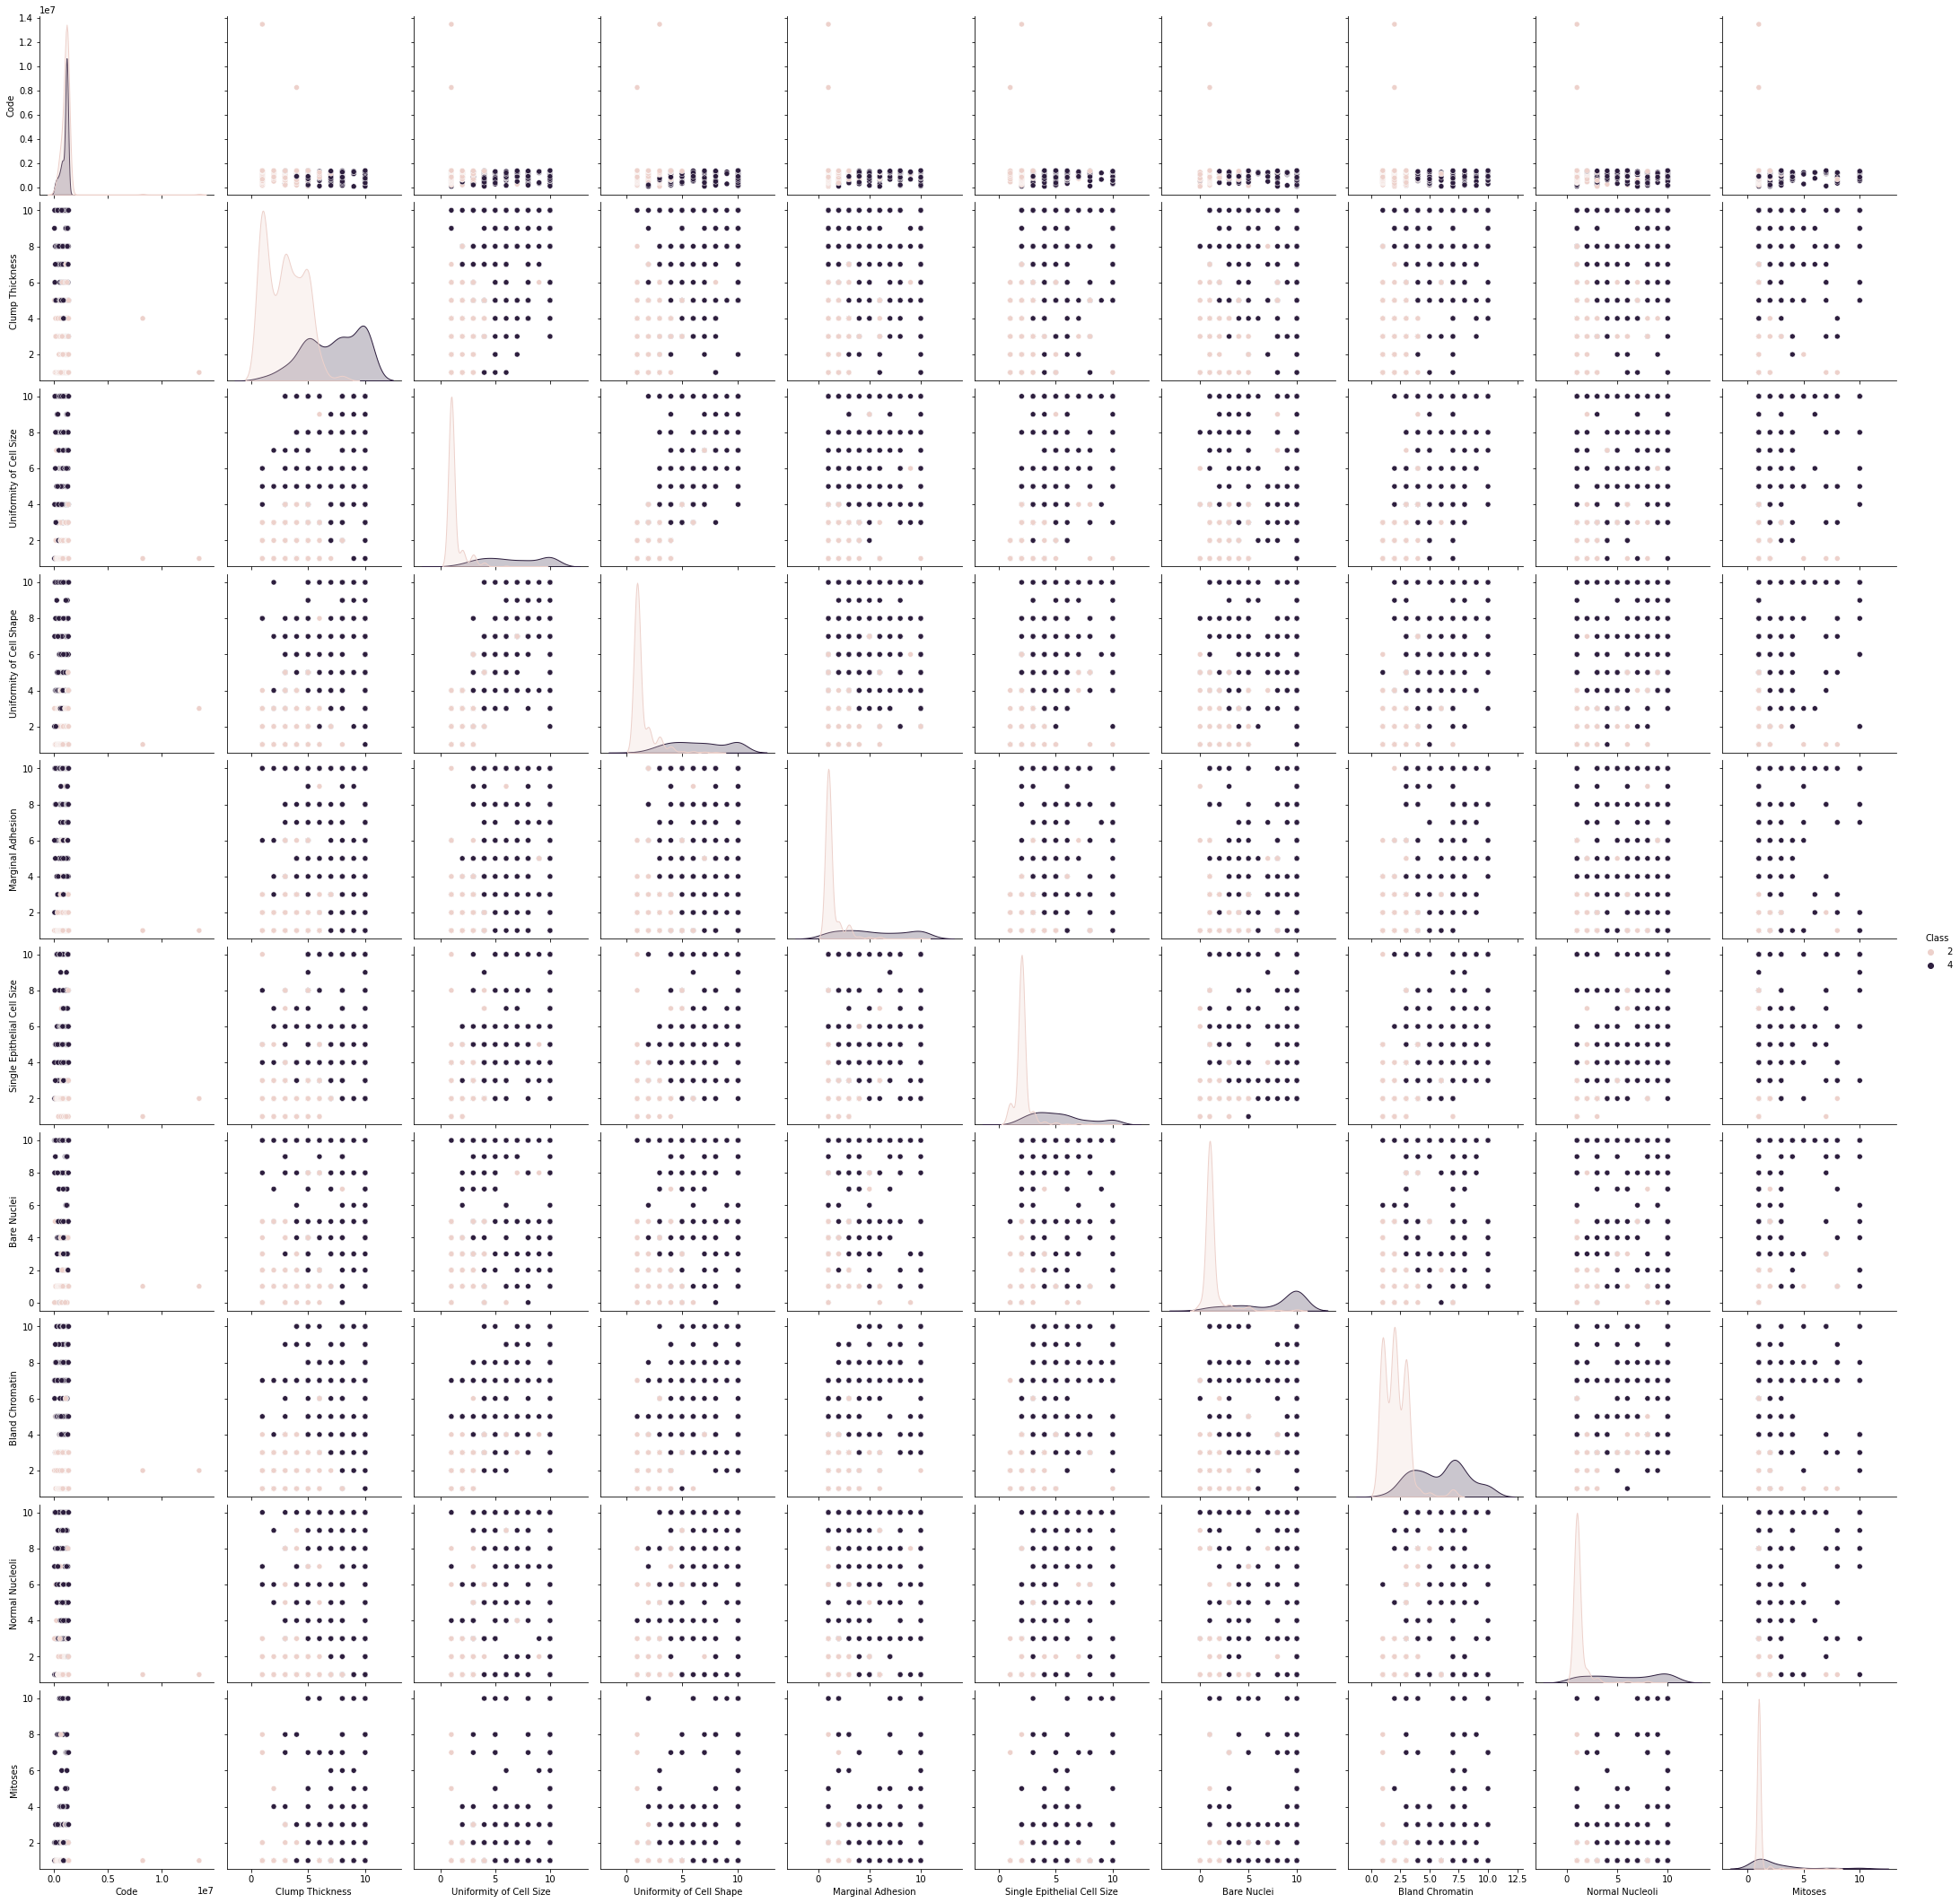

In [ ]:
sns.pairplot(breast_data, hue="Class", height=3)

Divide data for features and Class data:

X - data for prediction by Classes

y - data of classes

In [ ]:
X = breast_data.drop('Class', axis=1)
y = breast_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Types of ensemble learning algorithms:
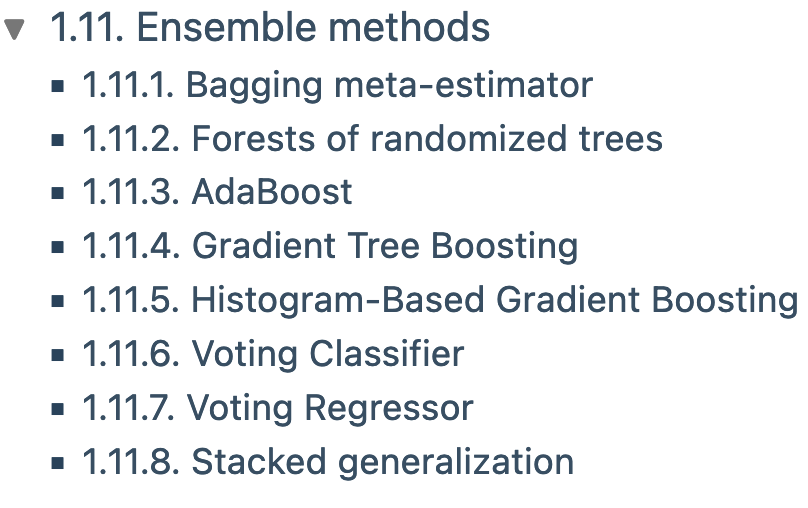

# Explaining of confusion_matrix:
* Predictions of Class(2) - benign is correct(first matrix index 0) and wrong(first matrix index 1) and Class(4) - malignant is correct(second matrix index 0) and wrong(second matrix index 1)

# Explaining of classification_report:
* bla bla bla

# Bagging Ensembles
use a decision tree as the base-model by default and you can specify the number of trees(n_estimators)

Return accuracy of prediction via cross_val_score

In [ ]:
from sklearn.ensemble import BaggingClassifier

# configure the ensemble model
estimators = 50
model = BaggingClassifier(n_estimators=estimators)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           2       0.96      0.97      0.96        95
           4       0.93      0.91      0.92        45

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

[[92  3]
 [ 4 41]]


In [ ]:
# example of evaluating a bagging ensemble for classification
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Voting Ensemble

A list of base-models can be provided as an argument to the model and each model in the list must be a tuple with a name and the model, e.g. (‘lr’, LogisticRegression()). The type of voting used for classification can be specified via the “voting” argument and set to either ‘soft‘ or ‘hard‘.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

# configure the models to use in the ensemble
models = [('lr', LogisticRegression()), ('nb', GaussianNB())]
# configure the ensemble model
model = VotingClassifier(models, voting='soft')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       1.00      0.02      0.04        45

    accuracy                           0.69       140
   macro avg       0.84      0.51      0.43       140
weighted avg       0.79      0.69      0.56       140

[[95  0]
 [44  1]]


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.958 (0.025)


# Stacking Ensemble

A list of base-models can be provided as an argument to the model and each model in the list must be a tuple with a name and the model, e.g. (‘lr’, LogisticRegression()). The meta-learner can be specified via the “final_estimator” argument and the resampling strategy can be specified via the “cv” argument and can be simply set to an integer indicating the number of cross-validation folds.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# configure the models to use in the ensemble
models = [('knn', KNeighborsClassifier()), ('tree', DecisionTreeClassifier())]
# configure the ensemble model
model = StackingClassifier(models, final_estimator=LogisticRegression(), cv=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           2       0.93      0.97      0.95        95
           4       0.93      0.84      0.88        45

    accuracy                           0.93       140
   macro avg       0.93      0.91      0.92       140
weighted avg       0.93      0.93      0.93       140

[[92  3]
 [ 7 38]]


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# From 3 variants of ensemble learning algorithms the better is simple Bagging ensemble with using decision tree and number of these trees